In [11]:
from cgi_decode import cgi_decode
from poly_fuzzer.common.abstract_executor import AbstractExecutor
from poly_fuzzer.fuzzers.random_fuzzer import RandomFuzzer
from poly_fuzzer.fuzzers.mutation_fuzzer import MutationFuzzer
from poly_fuzzer.common.abstract_seed import AbstractSeed
from poly_fuzzer.power_schedules.abstract_power_schedule import AbstractPowerSchedule
from poly_fuzzer.common.abstract_grammar import AbstractGrammar
from poly_fuzzer.fuzzers.cgi_fuzzer import CgiFuzzer
from poly_fuzzer.fuzzers.url_fuzzer import UrlFuzzer
from poly_fuzzer.power_schedules.url_schedule import UrlSchedule
from urllib.parse import urlparse
from html.parser import HTMLParser
import matplotlib.pyplot as plt
import numpy as np

### Generating random string with Random fuzzer for cgi_decode
Here is an example of how you can use the Random fuzzer to generate random strings for the cgi_decode function.
We only need to specify the executor object (the module to calculate the coverage of the program as it is being executed) to initialize the random fuzzer. Inside Random fuzzer we need to implement two functions: ```generate_input``` and ```_update```. We leave the ```_update``` function empty as we don't need to update the fuzzer based on the achieved coverage.

In [284]:
def test_cgi_decode(test_module):
    executor = AbstractExecutor(test_module)
    fuzzer = RandomFuzzer(executor)
    output = fuzzer.run_fuzzer(budget=10)  # Example time budget of 10 inputs
    assert output is not None
    print(output)

test_cgi_decode(cgi_decode)

{'coverage': [36, 37, 37, 37, 37, 37, 37, 37, 37, 37], 'inputs': ['pfjE#.ibbyCudS^zu!.~F5="oR}q+tIc"1g|5?WpeD{@6<qsZfZ9DVM/-O_T6hz%Wz{~{giEvS{r0b@8~rv8\'IzR(^GY', '>ZhU*ZyrIUe^j1=v7[-~pKea>N\\<aq;A*0_X`FR6z^/c^5Xl\';/<`>!M}!/1f"s&MSOsD0ho&vcY[V4?XI7pbqZg5{x@}', 'll)y[=vs)81^<I6_d+(b4kU-M:}$hvkyzaw7dttYCO)nhk:XaIioXE/]Wbj<!)vqy|*i#v%MNGQFRA%M"Vx1-!{TyV&8_Jr=@)@', 'gY4t=mc/.QKJRTCyW$eyR&xp1W)B-q0h0fet/FW)~6zV$-bWL$FFO~T&%5T[$?D)G{%Q<GBwv}ClDxTHzFtRE?VvGFXMMb', 'T\\aQwG]!*>YAqr&nZ$^c~H55ez11+",9e^:&Pa"#%7iBP3MH"V&Qe~wvY0"rA2WzK^\'tW;rPT`819*+l<`X1eCIT3W0OP', 'k+w</DNjXxQ,d^UWge,pAP84jama<trJGq??"D1"?U_l++tzxDnX8-Plq]0v+u#[7)y2@FAR3P}1}\\o3DzMv)4`(VT', 'gU*&|JIji~jT(|hJmE[N\'y\'b|KP)KZHw:bN[oW?f}p\\6F44]W`#o.xzB\'SQ6|_\\_~-MR8;?&kf94nTT<LHlni0-Y.U4E;\':"', ':,G{%AK!.W3JV7rD4|H!Y?DgA]qv>0sh62/V|?s0SiG;ji[#Qm6MD=GR5C@f3/;h!.Q`k^qh}uy((B4=Bo1#C~"aXKc', 'tVH*;RJY,!;%N6kPS7wN^k`gMOcvS{%*>Zvo+)hRc.txJ>$a.l$fHW>NBk<GiNaiGCrd8uJ`Z&h-kEk]z;DxBs!W;EA|', '87<X/[JtahCN9#{mGAO,<1DT\\.M".]Ft_/>It:s$8!.c

You should observe the ouput of the fuzzer after 10 generated inputs. The output includes such information as the number of covered lines achieved by each input, the relative coverage achieved, the inputs used, the time taken to generate the inputs, and the number of exceptions raised during the generation of the inputs.

### Generating random urls with Mutation fuzzer for the ```urllib.parse.urlparse``` module
Here is an example of how you can use the Mutation fuzzer to generate random urls for the ```urllib.parse.urlparse``` module. The mutation fuzzer requires the executor object as well as the Seed objects to be initialized. The seeds are then modified with random mutations to generate new inputs. The mutation fuzzer also requires the ```_update``` function to be implemented. This function is used to update the fuzzer based on the coverage achieved by the inputs.

In [2]:
def test_fuzzer(test_module):
    executor = AbstractExecutor(test_module)
    seeds = [AbstractSeed("www.google.com"), AbstractSeed("www.polymtl.ca")]
    fuzzer = MutationFuzzer(executor, seeds)

    output = fuzzer.run_fuzzer(budget=10)  # Example time budget of 10 inputs

    assert output is not None
    print(output)

test_fuzzer(urlparse)

{'coverage': [31, 31, 31, 31, 31, 32, 32, 32, 32, 32], 'inputs': ['www.google.com', 'www.polymtl.ca', 'www.olyml.ca', 'ww9ooleSm', '4old.c', 'mw.polyrtl#ca', 'mw.polyrtl#ca', 'w".pryt.ca', 'www.ao3ymX.cr', 'mw@o/yloMa'], 'execution_times': [0.24858427047729492, 0.003999471664428711, 0.007965087890625, 0.004035234451293945, 0.0080108642578125, 0.0039522647857666016, 0.0040400028228759766, 0.003997325897216797, 0.003999948501586914, 0.007966756820678711], 'exceptions': 0}


Here an example of adding a power schedule to the mutation fuzzer is also shown. The power schedule is used to prioritize the inputs that achieve higher coverage. In the current example this schedule assigns equal weights to all the seeds. You should implement a power schedule that considers the size of the inputs, their execution time, and achieved coverage to prioritize the inputs (combine coverage with one more criteria).

In [3]:
def test_fuzzer(test_module):
    executor = AbstractExecutor(test_module)
    powerschedule = AbstractPowerSchedule()
    seeds = [AbstractSeed("www.google.com"), AbstractSeed("www.polymtl.ca")]
    fuzzer = MutationFuzzer(executor, seeds, powerschedule)

    output = fuzzer.run_fuzzer(budget=10)  # Example time budget of 10 inputs

    assert output is not None
    print(output)

test_fuzzer(urlparse)

{'coverage': [13, 13, 31, 31, 31, 31, 31, 31, 31, 31], 'inputs': ['www.google.com', 'www.polymtl.ca', 'w}.olyl.c', 'w}.olyl.c', 'w3w.ole.o$', 'hWl`l', 's+oyl.c', 'wpom,.c', 'wwPdEon&tlF', 'f.]o1.om'], 'execution_times': [0.008030176162719727, 0.003966569900512695, 0.012000322341918945, 0.004000663757324219, 0.00803995132446289, 0.008001565933227539, 0.00795888900756836, 0.008000612258911133, 0.011997461318969727, 0.012000322341918945], 'exceptions': 0}


### Generating random html code with mutation fuzzer for the ```html.parser.HTMLParser.feed``` module
It takes the same arguments as the previous example. 

In [4]:
def test_fuzzer(test_module):
    executor = AbstractExecutor(test_module)
    powerschedule = AbstractPowerSchedule()
    seeds = [AbstractSeed("<html><head><title>Test</title></head>"), AbstractSeed("<body><h1>Parse me!</h1></body></html>")]
    fuzzer = MutationFuzzer(executor, seeds, powerschedule)

    output = fuzzer.run_fuzzer(budget=10)  # Example time budget of 5 seconds

    assert output is not None
    print(output)

test_fuzzer(HTMLParser().feed)

{'coverage': [68, 68, 68, 74, 74, 74, 74, 74, 74, 80], 'inputs': ['<html><head><title>Test</title></head>', '<body><h1>Parse me!</h1></body></html>', '<html>rh[an<i)le>Te&t</title></h7ad>', '<b9dy>s71>Parse me!</h1><body P/html>', '<b9dy>s71>Parse me!</h1><body P/html>', '<b9dy>s71>Parsee!/h1><body P/html>', '<body><h>rse me!</h1></body></html>', '<b9dy$s71>M1se te!</h1><bodyVP/hml>', '<bQdO><h0>Parse me!</h1></bod1></html>', '<b9dy>s71PWse me!2/1><Nody P/htHl0'], 'execution_times': [0.011999368667602539, 0.0120086669921875, 0.007994890213012695, 0.008000612258911133, 0.011993408203125, 0.00800013542175293, 0.012005805969238281, 0.007991790771484375, 0.008000373840332031, 0.004007816314697266], 'exceptions': 0}


### Using Grammar to generate seeds
Generating html code manually is a tedious task. One solution is to define Grammar that would allow us to generate valid html code automatically. Below we provide an example of how to create Grammar to generate valid US numbers. Your task is to create Grammar to generate valid html code and use it to generate seeds for the mutation fuzzer. 
You should also create grammar for the ```cgi_decode``` function as well as the ```urllib.parse.urlparse```.

In [5]:
gram = {
"<start>": ["<phone-number>"],
"<phone-number>": ["(<area>)<exchange>-<line>"],
"<area>": ["<lead-digit><digit><digit>"],
"<exchange>": ["<lead-digit><digit><digit>"],
"<line>": ["<digit><digit><digit><digit>"],
"<lead-digit>": ["2", "3", "4", "5", "6", "7", "8", "9"],
"<digit>": ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
}
grammar = AbstractGrammar(gram)

html_input = grammar.generate_input()

print(html_input)

(216)331-5706


You task is to implement the following modules:
- ```test_cgi_decode``` for the Mutation fuzzer for the ```cgi_decode``` function
- ```test_urlparse``` for the Mutation fuzzer for the ```urllib.parse.urlparse``` module
- ```test_feed``` for the Mutation fuzzer for the ```html.parser.HTMLParser.feed``` module

## Helper Functions

In [44]:
def plot_coverage(output, title, i):
    plt.plot(np.arange(100), output['coverage'], label='run #'+str(i+1))
    plt.xlabel('Number of Input Used')
    plt.ylabel('Number of Lines Covered')
    plt.title(title)
    plt.legend()

## Question 1

### Defining Grammar For cgi_decode

In [ ]:
url_gram = {
    "<start>": ["<url>"],
    "<url>": ["<scheme>://<host><path><query>"],
    "<scheme>": ["http", "https", "ftp"],
    "<host>": ["<hostname>"],
    "<hostname>": ["www.<string>.<tld>"],
    "<tld>": ["com", "org", "net", "edu", "gov"],
    "<ipv4>": ["<digit>.<digit>.<digit>.<digit>"],
    "<digit>": ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"],
    "<path>": ["/<string>"],
    "<query>": ["?<string>"],
    "<string>": ["<char><string>", "<char>"],
    "<char>": ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z", "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "-", "_", ".", "!", "~", "*", "'", "(", ")"],
    "<lead-digit>": ["2", "3", "4", "5", "6", "7", "8", "9"],
    }

def generate_url():
    url_grammar = AbstractGrammar(url_gram)
    url_input = url_grammar.generate_input()
    return url_input

#generate list of url inputs, max 10 seeds
url_inputs = [generate_url() for i in range(10)]
print(url_inputs)

['https://www.~.gov/pVhS?OS', 'https://www.I-wM.com/o?of', 'https://www...edu/!mVS6u*?D', 'ftp://www.wj.com/J?v', 'https://www.b.com/8?7', "http://www.C.net/~'t?4", 'https://www.JFr(D.net/0p6?9GfPkA', "http://www.x.gov/yw'?rh", 'http://www.nmu7e.net/ex4k(7?9', "http://www.X.com/B?j'I37z1"]


### Version 1: Coverage Directed, No Power Schedule, with grammar

In [25]:
def test_cgi_decode_v1(test_module):
    executor = AbstractExecutor(test_module)
    seeds = [AbstractSeed(url_inputs[i]) for i in range(10)]
    fuzzer = CgiFuzzer(executor, seeds)
    output = fuzzer.run_fuzzer(budget=100)
    assert output is not None
    return output

Coverage Convergence Plot

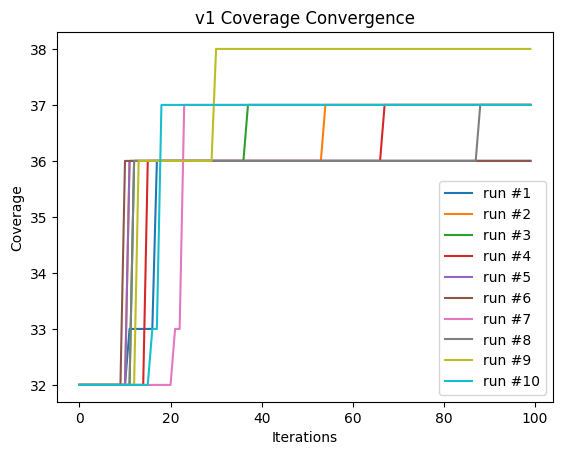

In [28]:
for i in range(10):
    v1_output = test_cgi_decode_v1(cgi_decode)
    plt.plot(np.arange(100), v1_output['coverage'], label='run #'+str(i+1))
    plt.xlabel('Iterations')
    plt.ylabel('Coverage')
    plt.title('v1 Coverage Convergence')
    plt.legend()


### Version 2: Power Schedule Enabled, Input From Grammar

In [3]:
def update_seeds(seeds, output):
    """This function updates the seeds with the coverage and execution time of the last run."""
    for i in range(10):
        seeds[i].coverage = output['coverage'][i]
        seeds[i].execution_time = output['execution_times'][i]
    return seeds

In [4]:
def test_cgi_decode_v2(test_module):
    executor = AbstractExecutor(test_module)
    powerschedule = UrlSchedule()

    seeds = [AbstractSeed(url_inputs[i]) for i in range(10)]
    fuzzer_no_ps = CgiFuzzer(executor, seeds)
    seeds_data = fuzzer_no_ps.run_fuzzer(budget=100)
    update_seeds(seeds, seeds_data)

    fuzzer = CgiFuzzer(executor, seeds, powerschedule)
    output = fuzzer.run_fuzzer(budget=100)
    assert output is not None
    return output

Coverage Convergence Plot

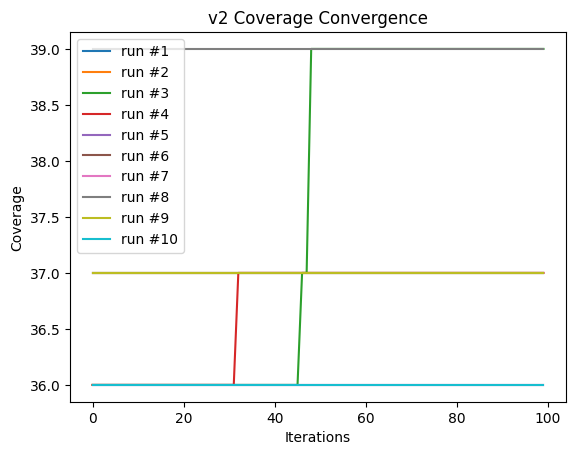

In [7]:
for i in range(10):
    v2_output = test_cgi_decode_v2(cgi_decode)
    plt.plot(np.arange(100), v2_output['coverage'], label='run #'+str(i+1))
    plt.xlabel('Iterations')
    plt.ylabel('Coverage')
    plt.title('v2 Coverage Convergence')
    plt.legend()

### Version 3: Power Schedule Enabled, No Grammar

In [9]:
def test_cgi_decode_v3(test_module):
    executor = AbstractExecutor(test_module)
    powerschedule = UrlSchedule()

    seeds = [AbstractSeed("www.google.com"), AbstractSeed("www.polymtl.ca"), AbstractSeed("www.github.com"), AbstractSeed("www.facebook.com"), AbstractSeed("www.twitter.com"), AbstractSeed("www.instagram.com"), AbstractSeed("www.linkedin.com"), AbstractSeed("www.reddit.com"), AbstractSeed("www.youtube.com"), AbstractSeed("www.wikipedia.org")]
    fuzzer_no_ps = CgiFuzzer(executor, seeds)
    seeds_data = fuzzer_no_ps.run_fuzzer(budget=100)
    update_seeds(seeds, seeds_data)

    fuzzer = CgiFuzzer(executor, seeds, powerschedule)
    output = fuzzer.run_fuzzer(budget=100)
    assert output is not None
    return output

Coverage Convergence Plot

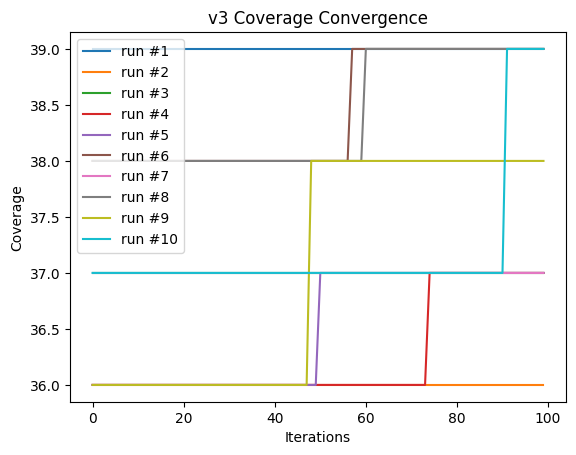

In [29]:
for i in range(10):
    v3_output = test_cgi_decode_v3(cgi_decode)
    plt.plot(np.arange(100), v3_output['coverage'], label='run #'+str(i+1))
    plt.xlabel('Iterations')
    plt.ylabel('Coverage')
    plt.title('v3 Coverage Convergence')
    plt.legend()

## Question 2

### Defining Grammar For url_parse

In [14]:
url_parse_grammar = {
    "<start>": ["<url>"],
    "<url>": ["<scheme>://<netloc>/<path>?<query>"],
    "<scheme>": ["http", "https", "ftp"],
    "<netloc>": ["<hostname>:<port>"],
    "<hostname>": ["www.<string>.<tld>"],
    "<string>": ["<char><string>", "<char>"],
    "<tld>": ["com", "org", "net", "edu", "gov"],
    "<port>": ["80", "443", "8080"],
    "<digit>": ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"],
    "<path>": ["/<segment>"],
    "<segment>": ["<identifier>", "<identifier>/<segment>"],
    "<identifier>": ["<char>", "<char><identifier>"],
    "<string>": ["<char><string>", "<char>"],
    "<char>": ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z", "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "-", "_", ".", "!", "~", "*", "'", "(", ")"],
    "<query>": ["<param>=<value>&<query>", "<param>=<value>"],
    "<param>": ["key1", "key2"],
    "<value>": ["value1", "value2"],
    "<fragment>": ["section1", "section2"]
    }

def generate_url():
    url_grammar = AbstractGrammar(url_parse_grammar)
    url_input = url_grammar.generate_input()
    return url_input

#generate list of url inputs, max 10 seeds
url_parse_inputs = [generate_url() for i in range(10)]
print(url_parse_inputs)

['http://www.N.com:80//9P?key1=value1', 'https://www.3C.com:8080//b/WJ_.?key2=value2&key1=value1', 'ftp://www.DZ.com:8080//kH/LL/f6WcA/D/*/qSySwjo/i/G/XaY/0U/m/9/f/m/I/OVP/v?key2=value1', 'http://www.CFq~2).edu:8080//Ed4/GM/R?key1=value2&key1=value2', "http://www.VPA.edu:443//4w9'?key1=value1", 'ftp://www.wB.com:443//.D?key2=value1&key1=value1&key2=value2&key1=value2&key2=value2&key2=value1&key2=value2&key2=value2&key2=value1&key1=value1&key2=value2&key2=value1&key2=value1', 'ftp://www.xlQ.edu:80//K/W?key1=value1', 'ftp://www.Gw.com:8080//R2/uH/!Dg8o)-/g1?key1=value1&key2=value2', 'http://www.y*.edu:80//Ob/y/c?key2=value2&key2=value1&key1=value1', 'https://www.3.edu:443//lZjyO/O0qhr3C?key2=value2&key2=value1']


### Version 1: Coverage Directed, No Power Schedule, with grammar

In [30]:
def test_url_decode_v1(test_module):
    executor = AbstractExecutor(test_module)
    seeds = [AbstractSeed(url_parse_inputs[i]) for i in range(10)]
    fuzzer = UrlFuzzer(executor, seeds)
    output = fuzzer.run_fuzzer(budget=100)
    assert output is not None
    return output

Coverage Convergence Plot

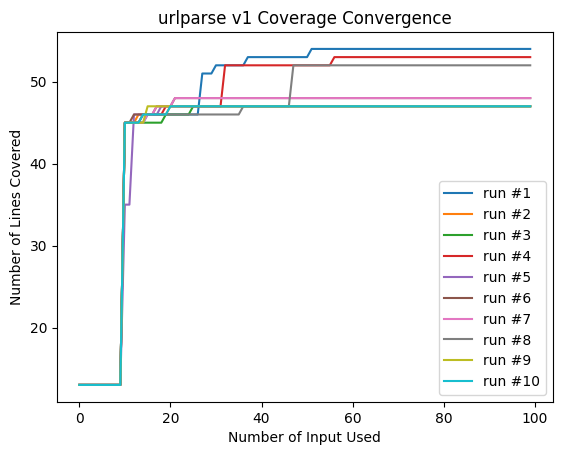

In [46]:
for i in range(10):
    plot_coverage(test_url_decode_v1(urlparse), 'urlparse v1 Coverage Convergence', i)

### Version 2: Power Schedule Enabled, Input From Grammar

In [52]:
def test_url_decode_v2(test_module):
    executor = AbstractExecutor(test_module)
    powerschedule = UrlSchedule()

    seeds = [AbstractSeed(url_parse_inputs[i]) for i in range(10)]
    fuzzer_no_ps = UrlFuzzer(executor, seeds)
    seeds_data = fuzzer_no_ps.run_fuzzer(budget=100)
    update_seeds(seeds, seeds_data)

    fuzzer = UrlFuzzer(executor, seeds, powerschedule)
    output = fuzzer.run_fuzzer(budget=100)
    assert output is not None
    return output

Coverage Convergence Plot

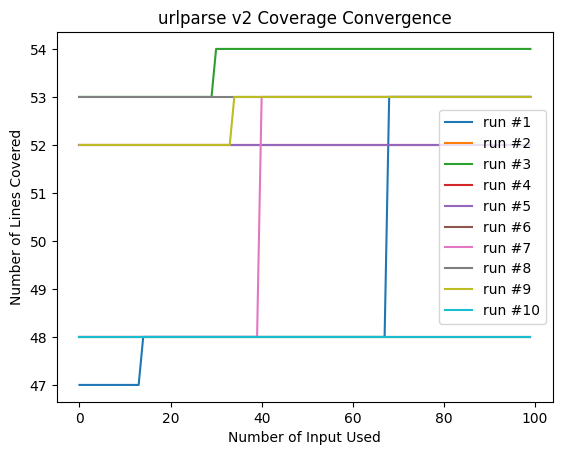

In [53]:
for i in range(10):
    plot_coverage(test_url_decode_v2(urlparse), 'urlparse v2 Coverage Convergence', i)

### Version 3: Power Schedule Enabled, No Grammar

In [54]:
def test_url_decode_v3(test_module):
    executor = AbstractExecutor(test_module)
    powerschedule = UrlSchedule()

    seeds = [AbstractSeed("www.google.com"), AbstractSeed("www.polymtl.ca"), AbstractSeed("www.github.com"), AbstractSeed("www.facebook.com"), AbstractSeed("www.twitter.com"), AbstractSeed("www.instagram.com"), AbstractSeed("www.linkedin.com"), AbstractSeed("www.reddit.com"), AbstractSeed("www.youtube.com"), AbstractSeed("www.wikipedia.org")]
    fuzzer_no_ps = UrlFuzzer(executor, seeds)
    seeds_data = fuzzer_no_ps.run_fuzzer(budget=100)
    update_seeds(seeds, seeds_data)

    fuzzer = UrlFuzzer(executor, seeds, powerschedule)
    output = fuzzer.run_fuzzer(budget=100)
    assert output is not None
    return output

Coverage Convergence Plot

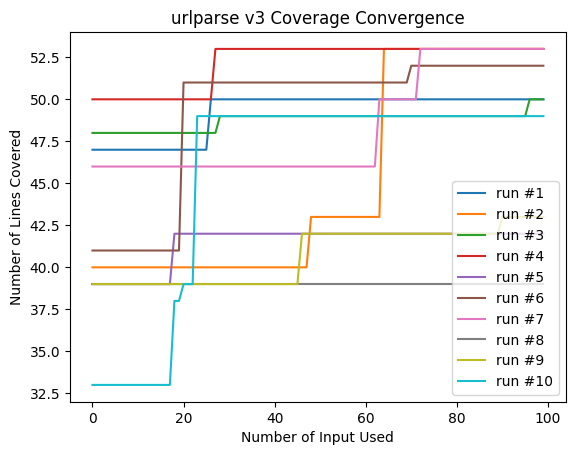

In [55]:
for i in range(10):
    plot_coverage(test_url_decode_v3(urlparse), 'urlparse v3 Coverage Convergence', i)